# Natural Language Processing 

For this project, you will be using data from GitHub repository README files. The goal will be to build a model that can predict them main programming language of a repository, given the text of the README file.

### Import Libraries

In [3]:
# Import standard python libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import base_acquire
from base_acquire import scrape_github_data
import wrangle
from wrangle import basic_clean, tokenize, stem, lemmatize, remove_stopwords, prep_article_data, clean

import unicodedata
import re
import json

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

# set up some basic matplotlib style parameters
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

# Planning

- Data Science Pipeline
- Stakeholders --> public
- Deliverables:
    - Git hub Repo
    - Google SpeadSheet
    - Final Report
    - Explore.py file
    - Acquire.py

# Acquire Data

### Get raw data

In [4]:
# Acquire raw data

original_readme = scrape_github_data()

#### Convert Raw Data --> JSON --> Pandas DF 

In [312]:
df = pd.DataFrame(original_readme)
df_copy = df.copy()
df_copy

,repo,language,readme_contents
0,ccxt/ccxt,JavaScript,# CCXT – CryptoCurrency eXchange Trading Libra...
1,openssl/openssl,C,Engines\n=======\n\nDeprecation Note\n--------...
2,HelloZeroNet/ZeroNet,JavaScript,# ZeroNet [![Build Status](https://travis-ci.o...
3,freqtrade/freqtrade,Python,# ![freqtrade](https://raw.githubusercontent.c...
4,amark/gun,JavaScript,"<p id=""readme""><a href=""https://gun.eco/""><img..."
...,...,...,...
127,microsoft/winget-cli,C++,# Windows Package Manager Client \n\nThis repo...
128,IntelLabs/control-flag,C++,**A friendly request: Thanks for visiting cont...
129,onnx/onnx,C++,<!--- SPDX-License-Identifier: Apache-2.0 -->\...
130,catchorg/Catch2,C++,"<a id=""top""></a>\n![Catch2 logo](data/artwork/..."


# Prepare Data

In [313]:
df.shape

(132, 3)

In [314]:
# df information summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             132 non-null    object
 1   language         132 non-null    object
 2   readme_contents  132 non-null    object
dtypes: object(3)
memory usage: 3.2+ KB


In [315]:
# Df describe summary
df.describe()

,repo,language,readme_contents
count,132,132,132
unique,129,25,129
top,data-edu/data-science-in-education,JavaScript,# Data Science in Education Using R <img src='...
freq,2,26,2


In [316]:
# Check for nulls 

df.isna().sum()

repo               0
language           0
readme_contents    0
dtype: int64

In [317]:
# Check nulls with languages

df.language.isna().any()

False

In [318]:
# Fill nulls with 0 if any (nulls non-existed)

df = df.fillna(0)

In [319]:
# Call the prepare function and create extra columns

prep_article_data(df, 'readme_contents', extra_words = [''], exclude_words = ['']).head()

,language,readme_contents,clean,stemmed,lemmatized
0,JavaScript,# CCXT – CryptoCurrency eXchange Trading Libra...,ccxt cryptocurrency exchange trading library b...,ccxt cryptocurr exchang trade librari build st...,ccxt cryptocurrency exchange trading library b...
1,C,Engines\n=======\n\nDeprecation Note\n--------...,engines deprecation note engine api introduced...,engin deprec note engin api wa introduc openss...,engine deprecation note engine api wa introduc...
2,JavaScript,# ZeroNet [![Build Status](https://travis-ci.o...,zeronet build statushttpstravisciorghellozeron...,zeronet build statushttpstravisciorghellozeron...,zeronet build statushttpstravisciorghellozeron...
3,Python,# ![freqtrade](https://raw.githubusercontent.c...,freqtradehttpsrawgithubusercontentcomfreqtrade...,freqtradehttpsrawgithubusercontentcomfreqtrade...,freqtradehttpsrawgithubusercontentcomfreqtrade...
4,JavaScript,"<p id=""readme""><a href=""https://gun.eco/""><img...",p idreadmea hrefhttpsgunecoimg width40 srchttp...,p idreadmea hrefhttpsgunecoimg width40 srchttp...,p idreadmea hrefhttpsgunecoimg width40 srchttp...


### Lower case all df

In [320]:
# Lower case all df

df = df.apply(lambda col: col.str.lower())
df.head()

,repo,language,readme_contents,clean,stemmed,lemmatized
0,ccxt/ccxt,javascript,# ccxt – cryptocurrency exchange trading libra...,ccxt cryptocurrency exchange trading library b...,ccxt cryptocurr exchang trade librari build st...,ccxt cryptocurrency exchange trading library b...
1,openssl/openssl,c,engines\n=======\n\ndeprecation note\n--------...,engines deprecation note engine api introduced...,engin deprec note engin api wa introduc openss...,engine deprecation note engine api wa introduc...
2,hellozeronet/zeronet,javascript,# zeronet [![build status](https://travis-ci.o...,zeronet build statushttpstravisciorghellozeron...,zeronet build statushttpstravisciorghellozeron...,zeronet build statushttpstravisciorghellozeron...
3,freqtrade/freqtrade,python,# ![freqtrade](https://raw.githubusercontent.c...,freqtradehttpsrawgithubusercontentcomfreqtrade...,freqtradehttpsrawgithubusercontentcomfreqtrade...,freqtradehttpsrawgithubusercontentcomfreqtrade...
4,amark/gun,javascript,"<p id=""readme""><a href=""https://gun.eco/""><img...",p idreadmea hrefhttpsgunecoimg width40 srchttp...,p idreadmea hrefhttpsgunecoimg width40 srchttp...,p idreadmea hrefhttpsgunecoimg width40 srchttp...


# Explore

## Initial Questions

- What are the most common words in READMEs?
- Does the length of the README vary by programming language?
- Do different programming languages use a different number of unique words?
- Are there any words that uniquely identify a programming language?

In [321]:
# Top 20 most common language

df.language.value_counts()

javascript          26
python              23
html                19
c++                 16
jupyter notebook    12
java                 6
c                    5
ruby                 3
c#                   2
go                   2
typescript           2
tex                  2
matlab               2
shell                2
groff                1
r                    1
css                  1
g-code               1
kotlin               1
swift                1
mathematica          1
assembly             1
php                  1
objective-c          1
Name: language, dtype: int64

In [322]:
# Lest 20 popular languages

df.language.value_counts().tail(20)

jupyter notebook    12
java                 6
c                    5
ruby                 3
c#                   2
go                   2
typescript           2
tex                  2
matlab               2
shell                2
groff                1
r                    1
css                  1
g-code               1
kotlin               1
swift                1
mathematica          1
assembly             1
php                  1
objective-c          1
Name: language, dtype: int64

### Visualize Distribution of program language

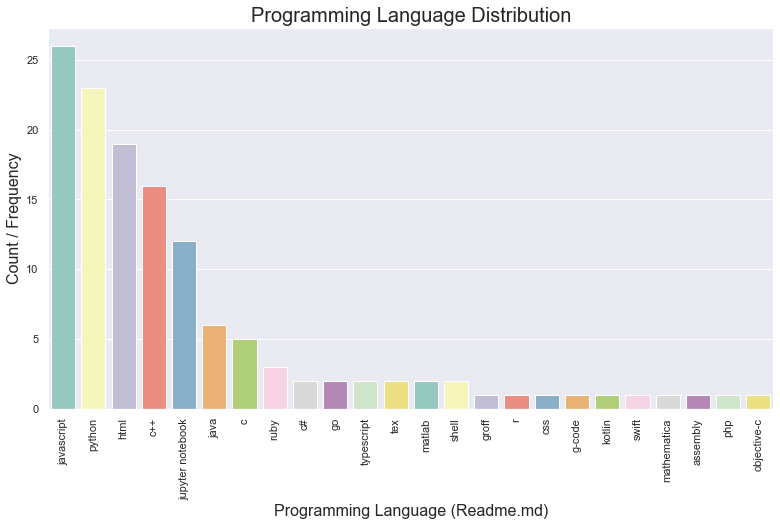

In [323]:
sns.set_theme(style="darkgrid")
titanic = sns.load_dataset("titanic")
ax = sns.countplot(x="language", data=df, palette="Set3",order = df['language'].value_counts().index)
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('Programming Language (Readme.md)', size = 16)
ax.set_ylabel('Count / Frequency', size = 16)
ax.set_title("Programming Language Distribution", size = 20)
None

### Q1 What are the most common words in READMEs?


In [324]:
df.language.unique()

array(['javascript', 'c', 'python', 'c++', 'swift', 'java', 'c#', 'php',
       'go', 'typescript', 'assembly', 'mathematica', 'html', 'css',
       'shell', 'kotlin', 'g-code', 'ruby', 'r', 'jupyter notebook',
       'matlab', 'tex', 'groff', 'objective-c'], dtype=object)

In [325]:
javascript_words = clean(' '.join(df[df.language == 'javascript'].clean))
c_words = clean(' '.join(df[df.language == 'c'].clean))
python_words = clean(' '.join(df[df.language == 'python'].clean))

c_plus_plus_words = clean(' '.join(df[df.language == 'c++'].clean))
swift_words = clean(' '.join(df[df.language == 'swift'].clean))
java_words = clean(' '.join(df[df.language == 'java'].clean))
c_sharp_words = clean(' '.join(df[df.language == 'c#'].clean))
go_words = clean(' '.join(df[df.language == 'go'].clean))
typescript_words = clean(' '.join(df[df.language == 'typescript'].clean))
mathematica_words = clean(' '.join(df[df.language == 'mathematica'].clean))
html_words = clean(' '.join(df[df.language == 'javascript'].clean))
css_words = clean(' '.join(df[df.language == 'css'].clean))
shell_words = clean(' '.join(df[df.language == 'shell'].clean))
kotlin_words = clean(' '.join(df[df.language == 'kotlin'].clean))
g_code_words = clean(' '.join(df[df.language == 'g-code'].clean))
ruby_words = clean(' '.join(df[df.language == 'ruby'].clean))
r_words = clean(' '.join(df[df.language == 'r'].clean))
jn_words = clean(' '.join(df[df.language == 'jupyter notebook'].clean))
matlab_words = clean(' '.join(df[df.language == 'matlab'].clean))
tex_words = clean(' '.join(df[df.language == 'tex'].clean))
groff_words = clean(' '.join(df[df.language == 'groff'].clean))
objective_c_words = clean(' '.join(df[df.language == 'objective-c'].clean))

all_words = clean(' '.join(df.clean))

### Word Frequencies

In [326]:
javascript_frequency = pd.Series(javascript_words).value_counts()


In [327]:
# splitting the entire sub-corpus of total words in a class type by spaces,
# turning the list output by split into a Series, then getting that value_counts()
javascript_frequency = pd.Series(javascript_words).value_counts()
c_frequency = pd.Series(c_words).value_counts()
python_frequency = pd.Series(python_words).value_counts()
c_plus_plus_frequency = pd.Series(c_plus_plus_words).value_counts()
swift_frequency = pd.Series(swift_words).value_counts()
java_frequency = pd.Series(java_words).value_counts()
c_sharp_frequency = pd.Series(c_sharp_words).value_counts()

go_frequency = pd.Series(go_words).value_counts()
typescript_frequency = pd.Series(typescript_words).value_counts()
mathematica_frequency = pd.Series(mathematica_words).value_counts()
html_frequency = pd.Series(html_words).value_counts()
css_frequency = pd.Series(css_words).value_counts()

shell_frequency = pd.Series(shell_words).value_counts()
kotlin_frequency = pd.Series(kotlin_words).value_counts()
g_code_frequency = pd.Series(g_code_words).value_counts()
ruby_frequency = pd.Series(ruby_words).value_counts()
r_frequency = pd.Series(r_words).value_counts()
jn_frequency = pd.Series(jn_words).value_counts()
matlab_frequency = pd.Series(matlab_words).value_counts()
tex_frequency = pd.Series(tex_words).value_counts()
groff_frequency = pd.Series(groff_words).value_counts()
objective_c_frequency = pd.Series(objective_c_words).value_counts()

all_words_frequency = pd.Series(all_words).value_counts()

In [328]:
# concat all frequencies together into a dataframe

word_counts = pd.concat([all_words_frequency, javascript_frequency, c_frequency, python_frequency, c_plus_plus_frequency,\
                         swift_frequency,java_frequency,c_sharp_frequency,\
                       go_frequency,typescript_frequency,mathematica_frequency,html_frequency,\
                         css_frequency,shell_frequency,kotlin_frequency,g_code_frequency,ruby_frequency,\
                       r_frequency,jn_frequency,matlab_frequency,tex_frequency,groff_frequency,\
                         objective_c_frequency], axis=1).fillna(0).astype(int)


word_counts.columns = ['all_words','javascript','c', 'python', 'c_plus_plus', 'swift','java','c_sharp',\
                       'go','typescript','mathematica','html','css','shell','kotlin','g_code','ruby',\
                       'r','jupyter_nb','matlab','tex','groff','objective_c']

### 20 Most frequently occuring words overall

In [423]:
# most common words

word_counts.sort_values(by ='all_words', ascending = False).head(20)

,all_words,javascript,c,python,c_plus_plus,swift,java,c_sharp,go,typescript,...,shell,kotlin,g_code,ruby,r,jupyter_nb,matlab,tex,groff,objective_c
data,623,73,18,63,31,25,18,4,1,4,...,6,3,2,45,17,35,3,0,1,1
version,410,179,16,19,43,16,16,3,24,12,...,18,0,0,13,0,6,11,0,1,5
use,401,91,40,61,52,18,14,8,8,13,...,1,0,3,16,0,22,12,2,0,6
9,366,59,1,164,1,3,62,38,1,3,...,0,0,1,0,6,1,0,0,0,1
run,343,106,23,34,41,2,16,10,9,34,...,2,0,0,10,0,19,1,0,1,9
code,333,61,37,37,70,5,11,9,3,6,...,1,0,0,11,0,18,5,2,1,1
project,316,59,8,68,34,7,8,3,6,3,...,6,0,0,6,0,27,0,0,0,18
build,309,65,51,11,87,8,12,8,11,7,...,0,0,0,35,0,3,0,0,0,0
using,300,78,29,34,26,3,10,3,10,14,...,2,2,1,8,9,22,4,1,0,3
install,296,85,9,68,59,1,4,11,8,10,...,6,0,0,6,0,9,0,0,0,2


### 20 least occuring words overall

In [330]:
word_counts.sort_values(by ='all_words', ascending = False).tail(20)

,all_words,javascript,c,python,c_plus_plus,swift,java,c_sharp,go,typescript,...,shell,kotlin,g_code,ruby,r,jupyter_nb,matlab,tex,groff,objective_c
stylefontvariantsmallcaps,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
discordhttpsimgshieldsiodiscord614395983807250433httpsdiscordgg78nvd3p,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
intently,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
followhttpsimgshieldsiotwitterfollowjslvtrstylesocial,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
httpstwittercomjslvtr,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
align,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
postgresqlp,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
linkhttpsgotecladorestapissale,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sqlalchemyan,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fileassetsdownloadrepozippng,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Q2 Does the length of the README vary by programming language?


#### Comparing the readme length of 10 most popular  langauges and 10 lest popular languages 

In [336]:
df.clean.head()

0    ccxt cryptocurrency exchange trading library b...
1    engines deprecation note engine api introduced...
2    zeronet build statushttpstravisciorghellozeron...
3    freqtradehttpsrawgithubusercontentcomfreqtrade...
4    p idreadmea hrefhttpsgunecoimg width40 srchttp...
Name: clean, dtype: object

In [346]:
df.head(3)

,repo,language,readme_contents,clean,stemmed,lemmatized
0,ccxt/ccxt,javascript,# ccxt – cryptocurrency exchange trading libra...,ccxt cryptocurrency exchange trading library b...,ccxt cryptocurr exchang trade librari build st...,ccxt cryptocurrency exchange trading library b...
1,openssl/openssl,c,engines\n=======\n\ndeprecation note\n--------...,engines deprecation note engine api introduced...,engin deprec note engin api wa introduc openss...,engine deprecation note engine api wa introduc...
2,hellozeronet/zeronet,javascript,# zeronet [![build status](https://travis-ci.o...,zeronet build statushttpstravisciorghellozeron...,zeronet build statushttpstravisciorghellozeron...,zeronet build statushttpstravisciorghellozeron...


In [390]:
df['count_clean'] = df['clean'].str.len()
df.head()

,repo,language,readme_contents,clean,stemmed,lemmatized,count_clean
0,ccxt/ccxt,javascript,# ccxt – cryptocurrency exchange trading libra...,ccxt cryptocurrency exchange trading library b...,ccxt cryptocurr exchang trade librari build st...,ccxt cryptocurrency exchange trading library b...,53918
1,openssl/openssl,c,engines\n=======\n\ndeprecation note\n--------...,engines deprecation note engine api introduced...,engin deprec note engin api wa introduc openss...,engine deprecation note engine api wa introduc...,10514
2,hellozeronet/zeronet,javascript,# zeronet [![build status](https://travis-ci.o...,zeronet build statushttpstravisciorghellozeron...,zeronet build statushttpstravisciorghellozeron...,zeronet build statushttpstravisciorghellozeron...,3873
3,freqtrade/freqtrade,python,# ![freqtrade](https://raw.githubusercontent.c...,freqtradehttpsrawgithubusercontentcomfreqtrade...,freqtradehttpsrawgithubusercontentcomfreqtrade...,freqtradehttpsrawgithubusercontentcomfreqtrade...,8068
4,amark/gun,javascript,"<p id=""readme""><a href=""https://gun.eco/""><img...",p idreadmea hrefhttpsgunecoimg width40 srchttp...,p idreadmea hrefhttpsgunecoimg width40 srchttp...,p idreadmea hrefhttpsgunecoimg width40 srchttp...,14845


In [392]:
df.count_clean

0      53918
1      10514
2       3873
3       8068
4      14845
       ...  
127     6450
128     8844
129     9443
130     2080
131     7781
Name: count_clean, Length: 132, dtype: int64

In [397]:
# Set the hypothesis

H0 = 'The length of the README.md file is the same for all languages'
H1 = 'The length of the README.md file is not the same for all languages '

In [411]:
top_10_languages = df[(df.language == 'javascript') | 
                      (df.language == 'python') | 
                      (df.language == 'html')| 
                      (df.language == 'c++') |
                     (df.language == 'jupyter notebook') |
                      (df.language == 'java')]

all_other_languanges = df[(df.language != top_10_languages) | (df.language != 'NaN')]

### Q3 Do different programming languages use a different number of unique words?


> #### Unique words for python and Javascript

In [195]:
pd.concat([word_counts[word_counts.javascript == 0].sort_values(by='python').tail(6),
           word_counts[word_counts.python == 0].sort_values(by='javascript').tail(6)])


,all_words,javascript,c,python,c_plus_plus,swift,java,c_sharp,go,typescript,...,shell,kotlin,g_code,ruby,r,jupyter_nb,matlab,tex,groff,objective_c
yellowhttpsviaplaceholdercom15ffff00text,26,0,0,26,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
x,43,0,0,26,1,0,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ctf,32,0,0,32,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brain,39,0,0,35,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
width90,38,0,0,38,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
model,135,0,2,63,2,0,7,0,15,12,...,0,0,0,4,0,21,2,0,0,0
j,66,47,2,0,2,0,0,0,0,1,...,0,0,0,0,0,3,1,0,0,1
forge,51,50,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
prohttpsimgshieldsiobadgeccxtproblackhttpsccxtpro,54,54,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
npm,132,90,0,0,0,0,0,0,0,29,...,5,0,0,0,0,0,0,0,0,5


### Q4 Words that uniquely identify programming language 

In [232]:
pd.concat([word_counts[word_counts.javascript == 0].sort_values(by = 'python').head(6),
           word_counts[word_counts.python == 0].sort_values(by = 'javascript').head(6)])


,all_words,javascript,c,python,c_plus_plus,swift,java,c_sharp,go,typescript,...,shell,kotlin,g_code,ruby,r,jupyter_nb,matlab,tex,groff,objective_c
lovehttpsbadgesfrapsoftcomosv2opensourcesvgv103httpsgithubcomvinitshahdeo,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
datahttpsgithubcompcmdpccovid19,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
latin,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
statushttpsgithubcomrvaughancoronavirusdataworkflowsfetch20latest20latin20america20databadgesvg,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
datahttpshttpsgithubcomdatascienceresearchperucovid19_latinoamerica,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
condaforgehttpscondaforgeorg,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
requesthttpsgithubcomapacheincubatordorispulls,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
textimagesbigopngrawtrue,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
textimagesbigomegapngrawtrue,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
textimagesthetapngrawtrue,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Visualize

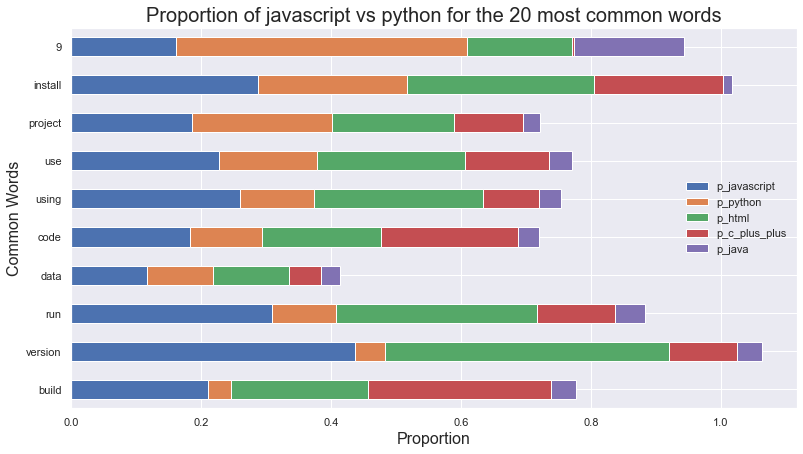

In [233]:
# figure out the percentage of spam vs ham
(word_counts
 .assign(p_javascript = word_counts.javascript / word_counts['all_words'],
         p_python = word_counts.python / word_counts['all_words'],
         p_html = word_counts.html / word_counts['all_words'],
         p_c_plus_plus = word_counts.c_plus_plus / word_counts['all_words'],
         p_java = word_counts.java / word_counts['all_words']

        ).sort_values(by = 'all_words')
 [['p_javascript', 'p_python', 'p_html', 'p_c_plus_plus', 'p_java']]
 .tail(10)
 .sort_values('p_python')
 .plot.barh(stacked = True))

plt.title('Proportion of javascript vs python for the 20 most common words', size = 20)
plt.ylabel('Common Words', size = 16)
plt.xlabel('Proportion', size = 16)
plt.show()

In [234]:
(word_counts
 [(word_counts.javascript > 10) & (word_counts.python > 10)]
 .assign(ratio=lambda df: df.javascript / (df.javascript + .01))
 .sort_values(by='ratio')
 .pipe(lambda df: pd.concat([df.head(), df.tail()])))

,all_words,javascript,c,python,c_plus_plus,swift,java,c_sharp,go,typescript,...,kotlin,g_code,ruby,r,jupyter_nb,matlab,tex,groff,objective_c,ratio
list,77,11,7,14,13,0,6,0,2,0,...,1,0,3,0,0,1,0,0,2,0.999092
information,105,11,9,16,14,2,8,2,5,6,...,0,0,11,2,4,2,1,0,0,0.999092
dependency,96,11,6,12,27,3,17,4,3,3,...,0,0,0,0,2,0,0,0,0,0.999092
date,69,11,1,21,4,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0.999092
way,54,11,8,13,5,1,4,2,0,1,...,0,0,1,0,1,0,0,0,0,0.999092
install,296,85,9,68,59,1,4,11,8,10,...,0,0,6,0,9,0,0,0,2,0.999882
use,401,91,40,61,52,18,14,8,8,13,...,0,3,16,0,22,12,2,0,6,0.999890
run,343,106,23,34,41,2,16,10,9,34,...,0,0,10,0,19,1,0,1,9,0.999906
version,410,179,16,19,43,16,16,3,24,12,...,0,0,13,0,6,11,0,1,5,0.999944
api,279,183,18,19,4,0,19,2,0,8,...,0,0,11,0,0,0,0,0,1,0.999945


### All Programming Languages Distribution

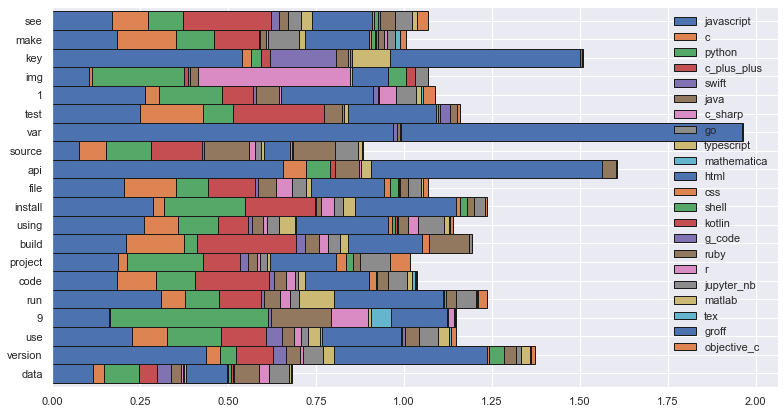

In [235]:
# Proportions of each row word occurance over all

(word_counts.sort_values('all_words', ascending = False)
 .head(20)
 .apply(lambda row: row / row['all_words'], axis = 1)
 .drop(columns = 'all_words')
 .plot.barh(stacked = True, width = 1, ec = 'k')
)
None

## Word Clouds 

In [236]:
# Import WordCloud Library

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

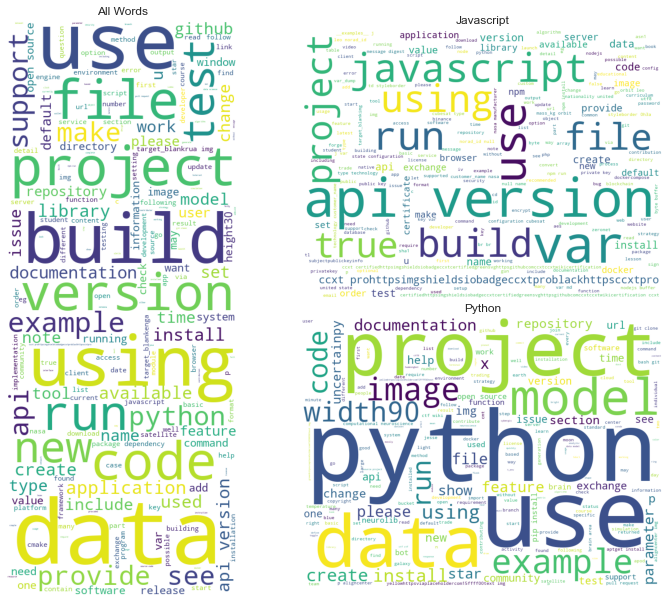

In [238]:
all_cloud = WordCloud(background_color='white', height=1000, width=400).generate(' '.join(all_words))
javascript_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(javascript_words))
python_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(python_words))

plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_cloud)
axs[1].imshow(javascript_cloud)
axs[2].imshow(python_cloud)

axs[0].set_title('All Words')
axs[1].set_title('Javascript')
axs[2].set_title('Python')

for ax in axs: ax.axis('off')

## N-grams

#### (a). Bigrams

> #### All Words

In [266]:
top_20_all_words_bigrams = (pd.Series(nltk.ngrams(all_words, 2))
                      .value_counts()
                      .head(20))

top_20_all_words_bigrams.head()


(api, version)                                               131
(9, 9)                                                       122
(open, source)                                                91
(target_blankrua, img)                                        87
(ccxt, prohttpsimgshieldsiobadgeccxtproblackhttpsccxtpro)     54
dtype: int64

#### Top 20 word by most common programming language:

In [270]:
top_20_javascript_bigrams = (pd.Series(nltk.ngrams(javascript_words, 2))
                      .value_counts()
                      .head(20))
top_20_python_bigrams = (pd.Series(nltk.ngrams(python_words, 2))
                      .value_counts()
                      .head(20))
top_20_c_plus_plus_bigrams = (pd.Series(nltk.ngrams(c_plus_plus_words, 2))
                      .value_counts()
                      .head(20))
top_20_swift_bigrams = (pd.Series(nltk.ngrams(swift_words, 2))
                      .value_counts()
                      .head(20))
top_20_java_bigrams = (pd.Series(nltk.ngrams(java_words, 2))
                      .value_counts()
                      .head(20))

print(f'JAVASCRIPT Bigram Words\n\n {top_20_javascript_bigrams}')
print(f'\n\nPYTHON Bigram Words\n\n {top_20_python_bigrams}')
print(f'\n\nC++ Bigram Words\n\n {top_20_python_bigrams}')
print(f'\n\nSWIFT Bigram Words\n\n {top_20_swift_bigrams}')
print(f'\n\nJAVA Bigram Words\n\n {top_20_java_bigrams}')

JAVASCRIPT Bigram Words

 (api, version)                                                                                         131
(ccxt, prohttpsimgshieldsiobadgeccxtproblackhttpsccxtpro)                                               54
(ccxt, certifiedhttpsimgshieldsiobadgeccxtcertifiedgreensvghttpsgithubcomccxtccxtwikicertification)     30
(certifiedhttpsimgshieldsiobadgeccxtcertifiedgreensvghttpsgithubcomccxtccxtwikicertification, ccxt)     28
(__examples__, j)                                                                                       28
(united, state)                                                                                         25
(npm, install)                                                                                          22
(npm, run)                                                                                              21
(nasa, manufacturer)                                                                                    20
(private, k

> #### All Words Bigrams

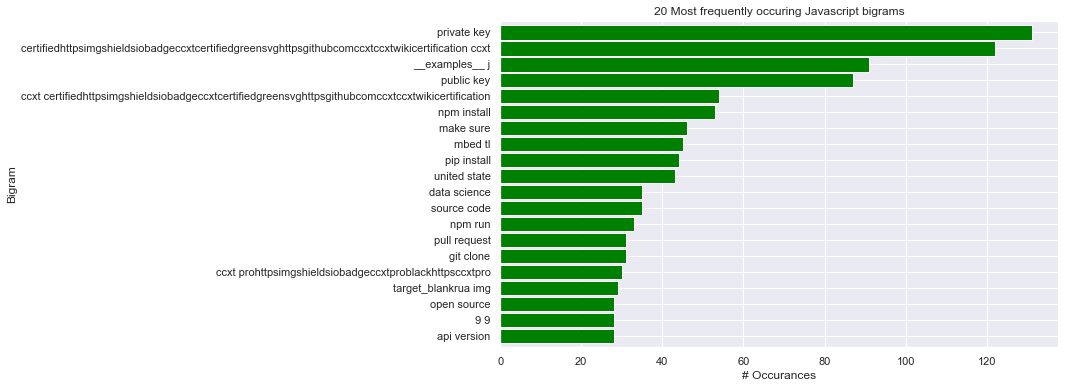

In [279]:
top_20_all_words_bigrams.sort_values().plot.barh(color='green', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring Javascript bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_all_words_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)


> #### Javascript Bigram

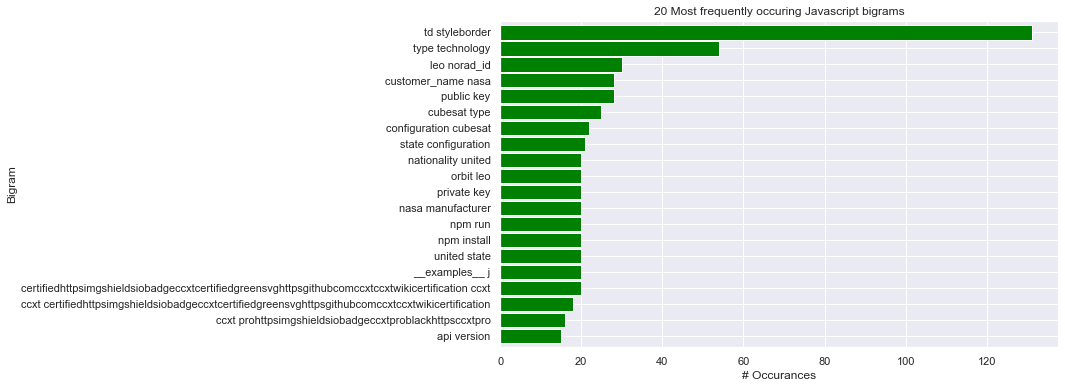

In [278]:
top_20_javascript_bigrams.sort_values().plot.barh(color='green', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring Javascript bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_javascript_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

#### Least common 20 words by programming Language:

In [280]:
top_20_javascript_bigrams = (pd.Series(nltk.ngrams(javascript_words, 2))
                      .value_counts()
                      .tail(20))
top_20_python_bigrams = (pd.Series(nltk.ngrams(python_words, 2))
                      .value_counts()
                      .tail(20))
top_20_c_plus_plus_bigrams = (pd.Series(nltk.ngrams(c_plus_plus_words, 2))
                      .value_counts()
                      .tail(20))
top_20_swift_bigrams = (pd.Series(nltk.ngrams(swift_words, 2))
                      .value_counts()
                      .tail(20))
top_20_java_bigrams = (pd.Series(nltk.ngrams(java_words, 2))
                      .value_counts()
                      .tail(20))

print(f'JAVASCRIPT Bigram Words\n\n {top_20_javascript_bigrams}')
print(f'\n\nPYTHON Bigram Words\n\n {top_20_python_bigrams}')
print(f'\n\nC++ Bigram Words\n\n {top_20_python_bigrams}')
print(f'\n\nSWIFT Bigram Words\n\n {top_20_swift_bigrams}')
print(f'\n\nJAVA Bigram Words\n\n {top_20_java_bigrams}')

JAVASCRIPT Bigram Words

 (note, 1)                           1
(1, using)                          1
(using, alternative)                1
(alternative, hash)                 1
(hash, eg)                          1
(eg, md)                            1
(sha1, pas)                         1
(pas, forgemdsha1create)            1
(forgemdsha1create, final)          1
(parameter, 2)                      1
(2, using)                          1
(nosalt, set)                       1
(set, salt)                         1
(salt, forgerandomgetbytessync8)    1
(forgerandomgetbytessync8, var)     1
(forgemdsha1create, md)             1
(sha1, var)                         1
(ivsize, md)                        1
(md, var)                           1
(password, admin)                   1
dtype: int64


PYTHON Bigram Words

 (radio, infrared)               1
(like, radio)                   1
(radiation, like)               1
(electromagnetic, radiation)    1
(form, electromagnetic)         1
(using,

## Exploration TakeAways

- Most common language is the javasctipt --> python --> html --> c++ --> jupyter notebook --> java
- __Most common words overall are:__

    - data
    - version
    - use
    - 9
    - run
    - code 
    - project
    - build
    - using 
    - install 
    - file
    - api
    - source 
    - var
    - test
    - 1
    - img
    - key 
    - make 
    - see
    
### <u>Words Distribution by top most commong programming language</u>

|PROGRAMMING LANGUAGE  | COMMON WORD | BIGRAM |
| :--- | :-: | :-: |
|Javascript | see | note, 1 |
|Python | key | radio, infrared |
|C++ | img | radio, infrared |
|Swift | 1 | io, 9 |
|Java | test | implementation, constructing |


    
- __JAVASCRIPT Bigram Words__
    - (note, 1)                           
    - (1, using)                          
    - (using, alternative)                
    - (alternative, hash)                 
    - (hash, eg)      
- __PYTHON Bigram Words__
    - (radio, infrared)               
    - (like, radio)                   
    - (radiation, like)               
    - (electromagnetic, radiation)    
    - (form, electromagnetic)  
- __C++ Bigram Words__
    - (radio, infrared)               
    - (like, radio)                   
    - (radiation, like)               
    - (electromagnetic, radiation)    
    - (form, electromagnetic)  
- __SWIFT Bigram Words__
    - (io, 9)                         
    - (tab, app)                      
    - (appropriate, framework)        
    - (general, tab)                  
    - (choose, general) 
- __JAVA Bigram Words__
    - (implementation, constructing)    
    - (constructing, dto)               
    - (object, inside)                  
    - (inside, spring)                  
    - (spring, repository)              

### MVPs
-
-
-

# Modeling

### Aim: Predict main programming language of by NLP of words in Github readme.md files.

#### Approach: 
- __TF:__ Term Frequency; how often a word appears in a document.
- __IDF:__ Inverse Documnet Frequency; a measure based on in how many documents will a word appear.
- __TF-IDF:__ A combination of the two measures above.

#### Import Modeling Libraries

In [433]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

### TF-IDF with Scikit-Learn

In [438]:
# Create object 
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df.clean)
y = df.language

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=.2)

train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

# Creat logistic regression object
lm = LogisticRegression().fit(X_train, y_train)

train['predicted'] = lm.predict(X_train)
test['predicted'] = lm.predict(X_test)

In [439]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.predicted, train.actual))
print('---')
print(classification_report(train.actual, train.predicted))


In [440]:
print('Accuracy: {:.2%}'.format(accuracy_score(test.actual, test.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(test.predicted, test.actual))
print('---')
print(classification_report(test.actual, test.predicted))
